## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')
# Display the data table for preview
mouse_metadata_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [65]:
mouse_metadata_study.shape

(1893, 8)

In [66]:
# Checking the number of mice.
mouse_metadata_study['Mouse ID'].nunique()

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dp_mice_id = mouse_metadata_study.loc[mouse_metadata_study.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
dp_mice_id

array(['g989'], dtype=object)

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_metadata_study.loc[mouse_metadata_study['Mouse ID']==dp_mice_id[0]]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [69]:
mouse_metadata_study[mouse_metadata_study['Mouse ID']==dp_mice_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_metadata_study.drop(mouse_metadata_study[mouse_metadata_study['Mouse ID']==dp_mice_id[0]].index).reset_index()
mouse_clean.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [71]:
# Checking the number of mice in the clean DataFrame.
mouse_clean['Mouse ID'].nunique()

248

In [72]:
# Checking the missing values of the table
mouse_clean.isnull().sum()

index                 0
Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_groups = mouse_clean.groupby(['Drug Regimen'])

tumor_mean = pd.DataFrame(regimen_groups.mean()['Tumor Volume (mm3)']).reset_index()
tumor_mean = tumor_mean.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

tumor_median = pd.DataFrame(regimen_groups.median()['Tumor Volume (mm3)']).reset_index()
tumor_median = tumor_median.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

tumor_var = pd.DataFrame(regimen_groups.var()['Tumor Volume (mm3)']).reset_index()
tumor_var = tumor_var.rename(columns={'Tumor Volume (mm3)':'Variance Tumor Volume'})

tumor_std = pd.DataFrame(regimen_groups.std()['Tumor Volume (mm3)']).reset_index()
tumor_std = tumor_std.rename(columns={'Tumor Volume (mm3)':'Std. Dev. Tumor Volume'})

tumor_sem = pd.DataFrame(regimen_groups.sem()['Tumor Volume (mm3)']).reset_index()
tumor_sem = tumor_sem.rename(columns={'Tumor Volume (mm3)':'Std. Err. Tumor Volume'})

df_list = [tumor_var, tumor_std, tumor_sem]

regimen_stat = pd.merge(tumor_mean, tumor_median, on='Drug Regimen', how='inner')

for df in df_list:
    regimen_stat = pd.merge(regimen_stat, df, on='Drug Regimen', how='inner')

In [96]:
regimen_stat.set_index('Drug Regimen')

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

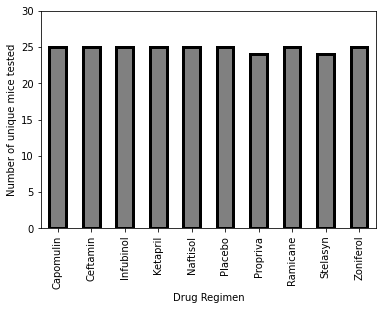

In [133]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_num_bar = pd.DataFrame(regimen_groups['Mouse ID'].nunique()).reset_index()
mice_num_bar.plot.bar('Drug Regimen', 'Mouse ID', rot=90, color='gray',edgecolor='black',linewidth=3, legend=False)
plt.ylim([0,30])
plt.ylabel('Number of unique mice tested')
plt.show()

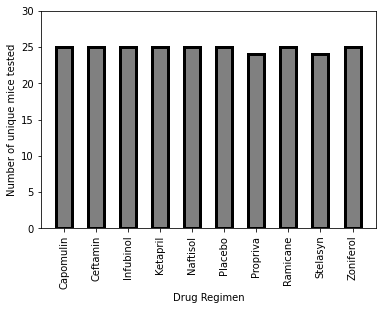

In [132]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = mice_num_bar['Drug Regimen']
y = mice_num_bar['Mouse ID']
plt.bar(x, y, color='gray',edgecolor='black',lw=3,width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of unique mice tested')
plt.ylim([0,30])
plt.show()

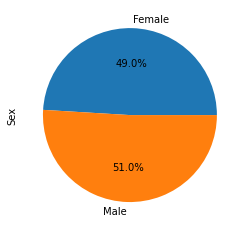

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = pd.DataFrame(mouse_clean.groupby(['Sex']).count()['Mouse ID'])
mouse_gender = mouse_gender.rename(columns={'Mouse ID':'Sex'})
mouse_gender.plot(kind='pie', y='Sex', autopct='%1.1f%%', legend=False)
plt.show()


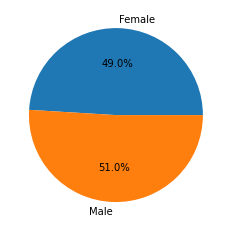

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender['Sex'],labels=mouse_gender.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [181]:
mouse_clean.head(3)

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22


In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
trt_mouse = mouse_clean.loc[mouse_clean['Drug Regimen'].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(trt_mouse.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_time_tumor = pd.merge(max_time, mouse_clean, on=['Mouse ID', 'Timepoint'], how='left')

In [190]:
last_time_tumor.head()

,Mouse ID,Timepoint,index,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,907,67.973419,2,Infubinol,Female,20,23
1,a251,45,289,65.525743,1,Infubinol,Female,21,25
2,a275,45,1487,62.999356,3,Ceftamin,Female,20,28
3,a411,45,470,38.407618,1,Ramicane,Male,3,22
4,a444,45,480,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
last_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatmnets:
    last_vol.append(last_time_tumor.loc[last_time_tumor['Drug Regimen']==treatment]['Tumor Volumn'])
    quartiles = last_vol.quantile([.25,.5,.75])
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
